# Setup

## Merge both datasets

In [1]:
# Import packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [2]:
# Load the datasets
df1 = pd.read_csv("../data/old_training_dataset.csv")
df2 = pd.read_csv("../data/new_training_dataset.csv")

In [3]:
df1.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df2.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


There are a few features that appear to be similar based on their names.

We can expect some issues because the older dataset has only binary features. For example, the first visible one is the 'URL_Length' which in the newer dataset has values such as 31, 23, 29... However, we plan to check the final distribution to see if normalization/scaling is needed.

In [5]:
# Rename columns in df2 to match df1
df2 = df2.rename(columns={
    "URLLength": "URL_Length",
    "DomainLength": "Domain_registeration_length",
    "NoOfSubDomain": "having_Sub_Domain",
    "HasFavicon": "Favicon",
    "NoOfURLRedirect": "Redirect",
    "NoOfiFrame": "Iframe",
    'label': 'Result'
})

In [6]:
# Also relabel the target class to match both
df2['Result'] = df2['Result'].replace(0, -1)

In [7]:
df2.head()

,URL_Length,Domain_registeration_length,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,having_Sub_Domain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,Result
0,31,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


This step of selecting features is important as we want to ensure consistency between the two datasets.

Some features had similar meaning but different names.
- 'NoOfURLRedirect' was renamed to 'Redirect' despite the presence of 'NoOfSelfRedirect' because it aligns better with the idea of how many times the user is redirected through external URLs.
- 'DomainLength' was mapped to 'Domain_registeration_length'
- And the rest was renamed to their respective equivalents as well, based on their descriptions and role

We also relabeled the target class for df2 to match.

In [8]:
# To keep only common columns, we decided to simply take the intersection of their sets
common_columns = list(set(df1.columns) & set(df2.columns))
df1_cc = df1[common_columns].copy()
df2_cc = df2[common_columns].copy()

In [9]:
# Downsample the new dataset
df2_sampled = df2_cc.sample(n=len(df1_cc), random_state=42) # we set the random_state for reproducibility

Looking at both datasets, we noticed a higher number of elements for each feature that the new dataset has. Due to this, we thought that it would be better to downsample it to the same length as for the older one, so that it won't dominate the training.

In [10]:
# Combine datasets
merged_df = pd.concat([df1_cc, df2_sampled], ignore_index=True) # We included ignore_index because Pandas preserves the original row indices, and we want to reindex everything from scratch for a cleaner version

In [11]:
# Move the target class to the end
result = merged_df.pop('Result')
merged_df['Result'] = result

In [12]:
# Preview
print(merged_df.head())

   Iframe  Redirect  having_Sub_Domain  Domain_registeration_length  Favicon  \
0       1         0                 -1                           -1        1   
1       1         0                  0                           -1        1   
2       1         0                 -1                           -1        1   
3       1         0                 -1                            1        1   
4       1         0                  1                           -1        1   

   URL_Length  Result  
0           1      -1  
1           1      -1  
2           0      -1  
3           0      -1  
4           0       1  


In [13]:
# Save as csv
merged_df.to_csv("../data/merged_dataset.csv", index=False)

# Explore the merged dataset

In [14]:
# Load the dataset
df = pd.read_csv("../data/merged_dataset.csv")

In [15]:
# See the first 5 rows
df.head()

,Iframe,Redirect,having_Sub_Domain,Domain_registeration_length,Favicon,URL_Length,Result
0,1,0,-1,-1,1,1,-1
1,1,0,0,-1,1,1,-1
2,1,0,-1,-1,1,0,-1
3,1,0,-1,1,1,0,-1
4,1,0,1,-1,1,0,1


In [16]:
# Print information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Iframe                       22110 non-null  int64
 1   Redirect                     22110 non-null  int64
 2   having_Sub_Domain            22110 non-null  int64
 3   Domain_registeration_length  22110 non-null  int64
 4   Favicon                      22110 non-null  int64
 5   URL_Length                   22110 non-null  int64
 6   Result                       22110 non-null  int64
dtypes: int64(7)
memory usage: 1.2 MB


We can already see that features are not null integers. Moreover, we already checked each dataset individually, and we proved the same thing. Therefore, we will skip the check of null values.

In [17]:
df.describe()

,Iframe,Redirect,having_Sub_Domain,Domain_registeration_length,Favicon,URL_Length,Result
count,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000,22110.000000
mean,1.178245,0.124016,0.609679,10.498507,0.491678,16.819900,0.128087
std,3.570111,0.329608,0.898069,12.599674,0.660044,27.650745,0.991785
min,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000
50%,1.000000,0.000000,1.000000,2.500000,1.000000,7.500000,1.000000
75%,1.000000,0.000000,1.000000,20.000000,1.000000,28.000000,1.000000
max,263.000000,1.000000,6.000000,93.000000,1.000000,722.000000,1.000000


In [18]:
# Check for duplicates
df.duplicated().sum()

np.int64(18887)

The number of duplicates was expected due to binary features.

In [19]:
# Check target class
df['Result'].value_counts()

Result
 1    12471
-1     9639
Name: count, dtype: int64

It does not seem to have a critical imbalance at all.

## Check class imbalance

<Axes: xlabel='Result', ylabel='count'>

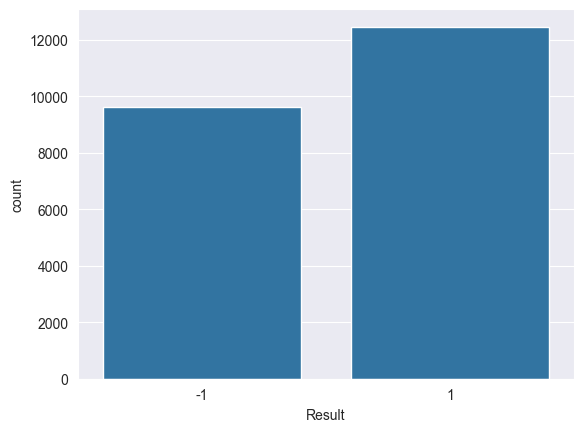

In [20]:
# Class distribution plot
sns.countplot(x='Result', data=df)

The plot helps us visualize even better the fact that we don't have to deal with imbalance. Therefore, there is no need to consider resampling.

# Visualizations

## Feature Correlation Heatmap

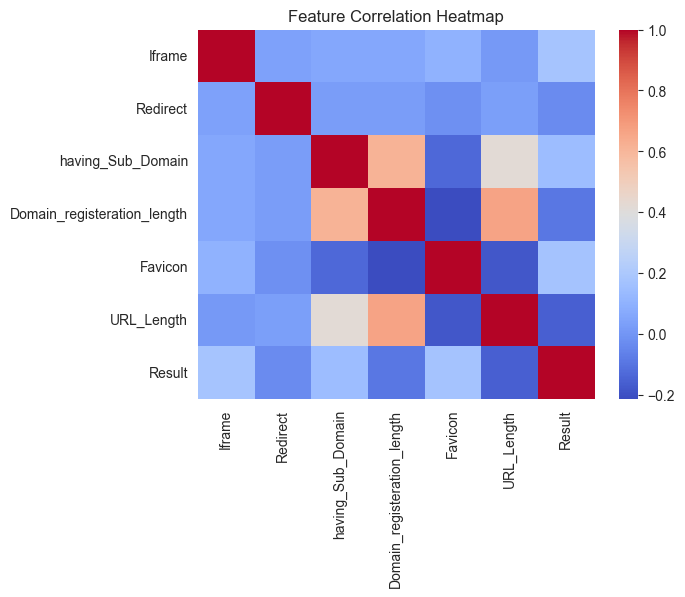

In [21]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

As we already know, a more intense color represents a stronger correlation which can be either positive or negative.

There is some visible correlation between 'having_Sub_Domain' - 'Domain_registeration_length', 'having_Sub_Domain' - 'URL_Length', and 'Domain_registeration_length' - 'URL_Length', but unfortunately, most of the values seem weak.

## Feature Correlation with 'Result'

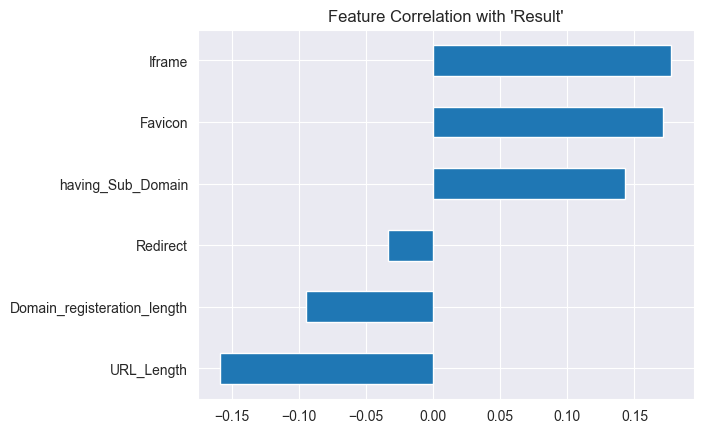

In [22]:
corr_with_target = df.corr()['Result'].drop('Result').sort_values()
corr_with_target.plot(kind='barh', title="Feature Correlation with 'Result'")
plt.show()

- Positive bars show positively correlated features with Result
- Negative bars show negatively correlated features with Result

## Pairplot with two highly relevant features vs 'Result'

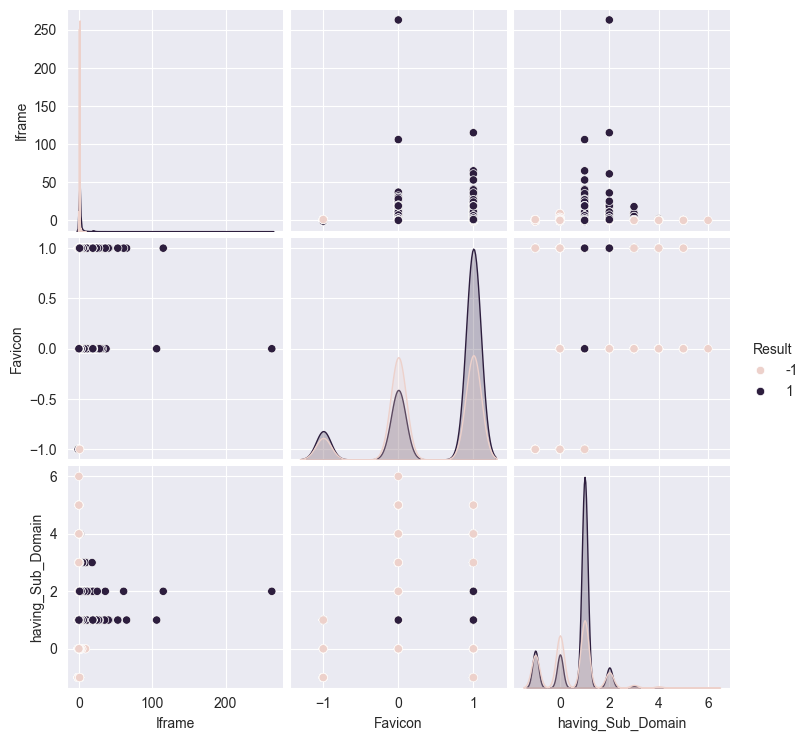

In [25]:
sns.pairplot(df[['Iframe', 'Favicon', 'having_Sub_Domain', 'Result']], hue="Result")

This plot is quite tricky to interpret. We have to break it down:

- The diagonal plots, which are some kind of histograms, show distributions of each feature per class
- The scatter plots show how the features behave together

For 'Iframe', legitimate values are tightly clustered near 0, but some also go up. And phishing values are mostly at 0.

For 'Favicon' legitimate values are mostly at 0 and 1, and phishing has a wider spread across -1, 0, and 1.

And for 'having_Sub_Domain' both classes have most values around 1 and 2. However, phishing has more values going up to 4-6, while legitimate stops mostly at 2.

_# Split the data

In [26]:
# Separate the target first
X = df.drop('Result', axis=1)
y = df['Result']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

We applied an 80%-20% split using a random seed of 42. We included this seed as well, because we want to have consistent results. In this way, we make sure that we get the same split every time we run the code.

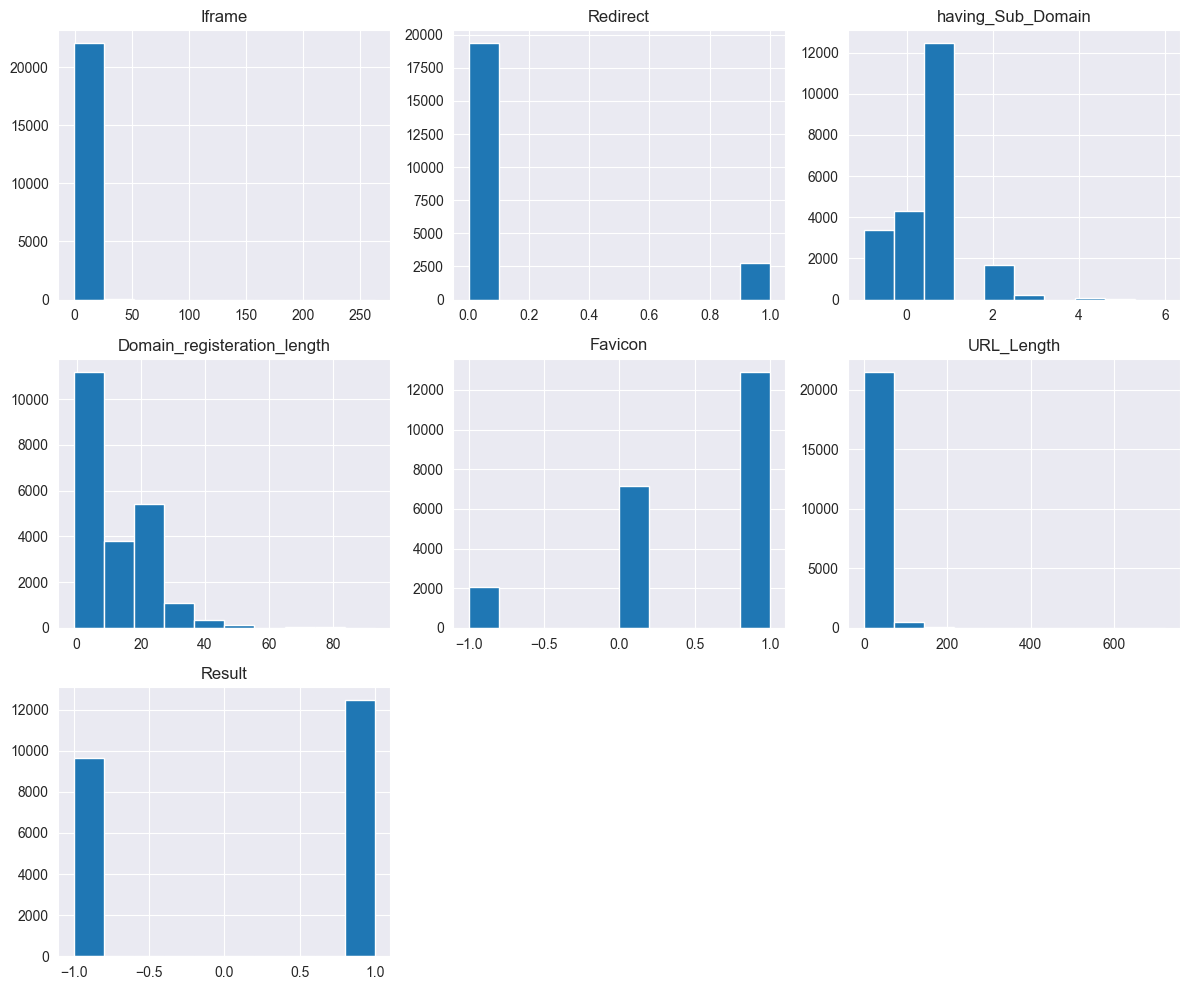

In [28]:
# Plot distributions
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

We can see that most features are highly skewed, which confirms the fact that scaling is required before applying distance-based models.

- 'Iframe' has a dominant peak at 0
- 'Redirect' has binary values
- 'having_Sub_Domain' values have a wider range and are not just binary, with most of them around 1
- 'Domain_registeration_length' and 'URL_Length' are right-skewed, representing the reason why we need to consider scaling, as they can dominate the distance and introduce bias.
- 'Favicon' clearly has only three values: -1, 0, and 1

+## Prepare a scaled version

In [29]:
# Scale the features
scaler = StandardScaler()

# Fit only on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training phase


Training: LogisticRegression


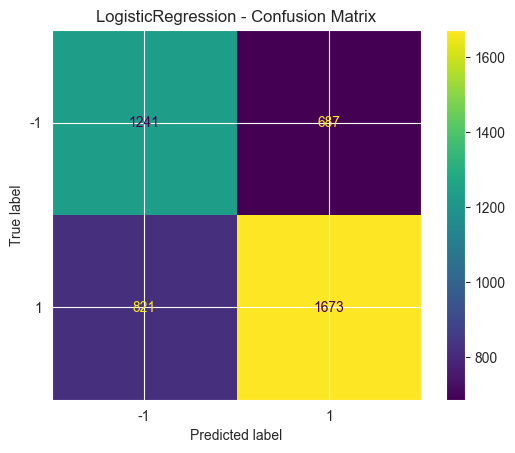


Training: KNeighborsClassifier


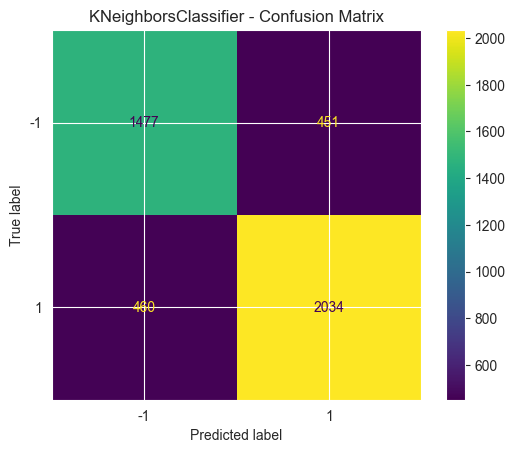


Training: DecisionTreeClassifier


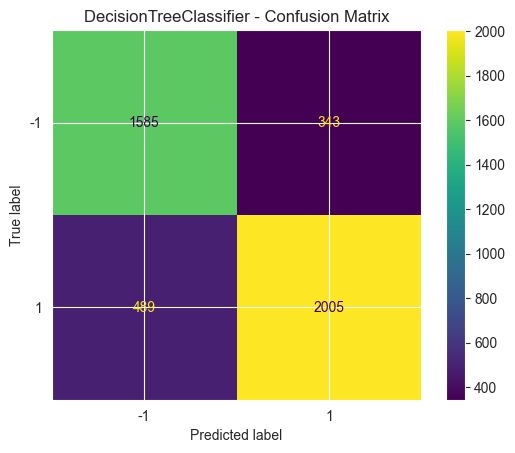

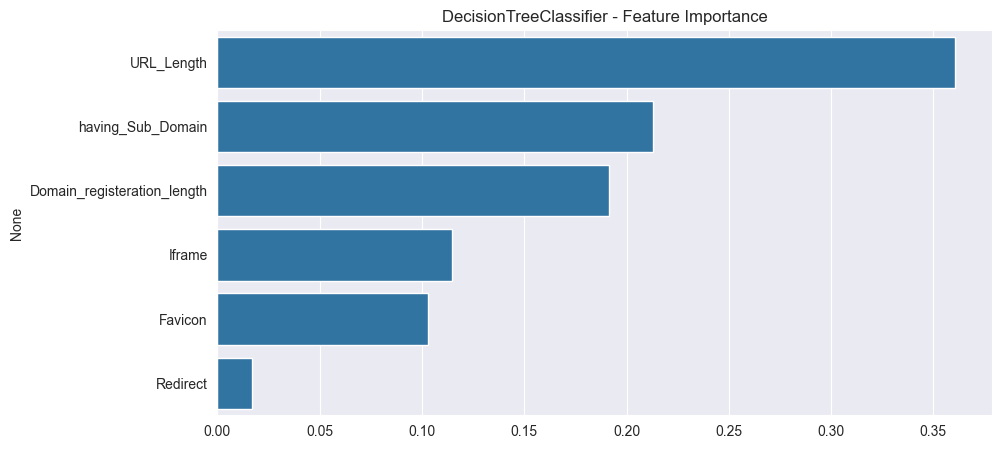


Training: RandomForestClassifier


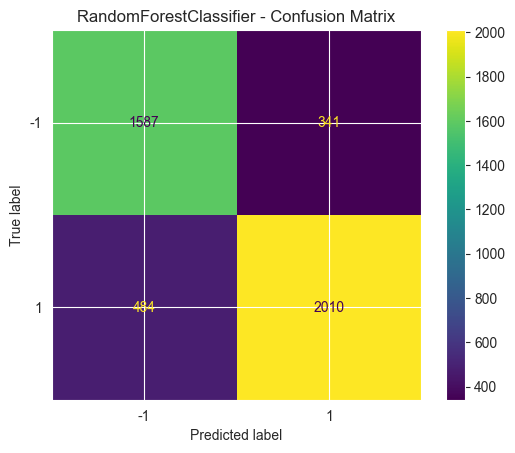

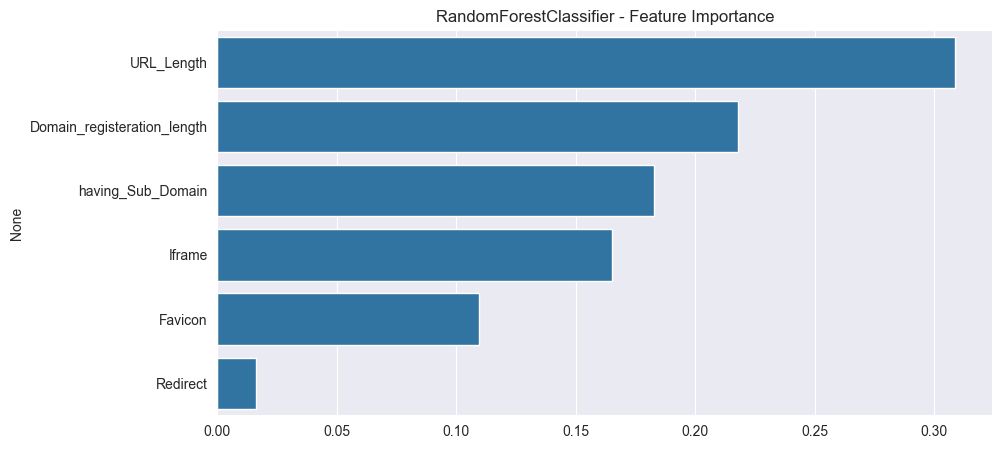

                    Model  Accuracy  Precision    Recall  F1 Score
0      LogisticRegression  0.658978   0.708898  0.670810  0.689328
1    KNeighborsClassifier  0.793985   0.818511  0.815557  0.817032
2  DecisionTreeClassifier  0.811850   0.853918  0.803929  0.828170
3  RandomForestClassifier  0.813433   0.854955  0.805934  0.829721


In [30]:
np.random.seed(42)

# Models to train
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Scaled or not
use_scaled = {
    "LogisticRegression": True,
    "KNeighborsClassifier": True,
    "DecisionTreeClassifier": False,
    "RandomForestClassifier": False
}

results = []

# Train and evaluate
for name, model in models.items():
    print(f"\nTraining: {name}")

    if use_scaled[name]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        X_input = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_input = X_test

    # Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='binary', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='binary', zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, average='binary', zero_division=0)
    })

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_input, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Feature Importance if exists
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X.columns if not use_scaled[name] else X.columns  # same columns
        plt.figure(figsize=(10, 5))
        sns.barplot(x=importances[indices], y=feature_names[indices])
        plt.title(f"{name} - Feature Importance")
        plt.show()

# Show results
results_df = pd.DataFrame(results)
print(results_df)

Our results generally looked better than we expected. 'URL_Length' as a feature seems to dominate in importance. Moreover, false positives and false negatives are in an adequate range.

Just like for the previous analysis, Random Forest slightly outperforms all other classifiers, showing the highest F1 Score, and balanced results across all metrics. It was able to handle imbalanced features, making it robust and less prone to overfitting, even without using the scaled version of the dataset. It also provides feature importance, and we can see that 'URL_Length' and 'Domain_registeration_length' contribute the most.

The Decision Tree also has good results showing strong performance.

KNN and Logistic Regression perform reasonably. However, Logistic Regression struggles with the dataset quite a bit, and produces the worst results. This may be due to the complexity of the relationships.